In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

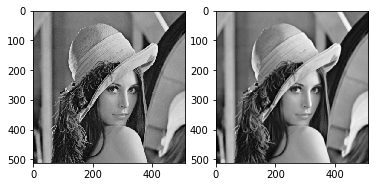

In [73]:
# Perform Gaussian Filter (denoises)
img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE) # read in grayscale mode
dst = cv2.GaussianBlur(src=img,ksize=(5,5),sigmaX=1)

plt.subplot(121),plt.imshow(img, cmap='gray')
plt.subplot(122),plt.imshow(dst, cmap='gray')
plt.show()

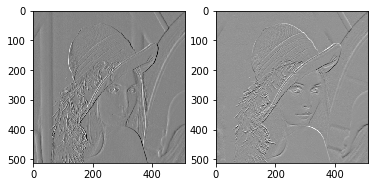

In [142]:
# Calculate Sobel Operator
ksize=3
Gx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=ksize)
Gy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=ksize)

plt.subplot(121),plt.imshow(Gx,cmap='gray')
plt.subplot(122),plt.imshow(Gy,cmap = 'gray')
plt.show()

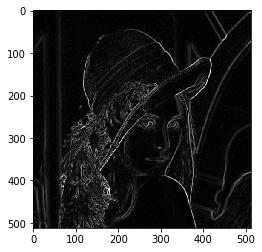

In [145]:
def gradient_map(Gx, Gy):
    return np.sqrt(Gx**2 + Gy**2)

def edge_direction(Gx, Gy):
    return np.sign(np.abs(Gx) - np.abs(Gy)) # 1 = vertical edge, -1 = horizontal edge

gradient = gradient_map(sobelx, sobely)
ed_map = edge_direction(sobelx, sobely)
plt.imshow(gradient, cmap='gray')
plt.show()

In [93]:
cv2.Sobel?